In [22]:
import pandas as pd 
from slugify import slugify

df = pd.read_csv("_Scores.csv") 
df.columns = [slugify(x) for x in df.columns]

# remove unnecessary long names for clean plotting 
df.columns = [x.replace("np-mean-lr-object-","mu-") for x in df.columns]
df.columns = [x.replace("np-std-lr-object-","std-") for x in df.columns]
df.columns = [x.replace("datapoints-train-sample-mean","trainSize") for x in df.columns]
df.columns = [x.replace("datapoints-test-sample-mean","valSize") for x in df.columns]

df.sample(20)

,model,city,seed,depth,tod,datapoints,trainSize,valSize,mu-scores-mse,std-scores-mse,mu-scores-qwk,std-scores-qwk,num-splits
3,lasso,Istanbul,15,1,6,"(94, 16)",62.0,32.0,1.441261,0.000000e+00,0.000000,0.000000,7
192,linearregression,Bogota,65,1,6,"(67, 16)",44.0,23.0,3.070998,4.440892e-16,-0.061538,0.000000,7
12,linearregression,MexicoCity,15,1,6,"(90, 16)",60.0,30.0,50.461487,7.105427e-15,-0.000123,0.000000,7
517,gradientboostingregressor,Istanbul,175,1,6,"(212, 16)",142.0,70.0,1.708092,1.014993e-01,0.049883,0.024460,7
254,randomforestregressor,Istanbul,85,1,6,"(295, 16)",197.0,98.0,1.543082,2.434093e-02,0.068253,0.026353,7
377,gradientboostingregressor,London,105,1,6,"(246, 16)",164.0,82.0,13.802684,2.640543e-01,-0.100307,0.009510,7
378,gradientboostingregressor,Istanbul,115,1,6,"(270, 16)",180.0,90.0,0.821809,2.372313e-02,0.123617,0.029500,7
576,linearregression,Istanbul,265,1,6,"(158, 16)",105.0,53.0,1.789867,0.000000e+00,0.064502,0.000000,7
184,gradientboostingregressor,Capetown,55,1,6,"(573, 16)",383.0,190.0,0.833275,2.680543e-03,0.086732,0.014702,7
196,lasso,MexicoCity,65,1,6,"(263, 16)",176.0,87.0,10.039476,1.776357e-15,0.000000,0.000000,7


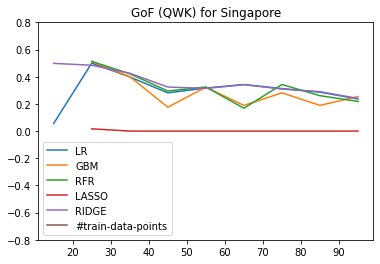

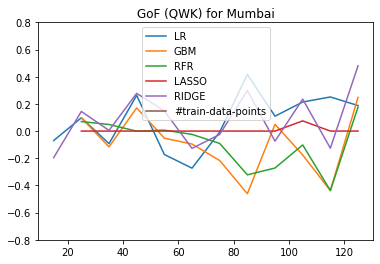

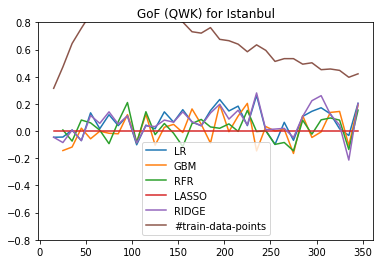

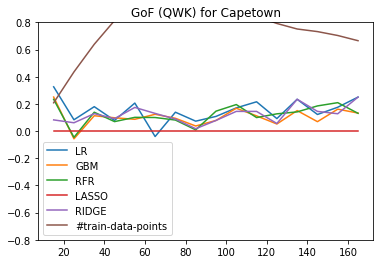

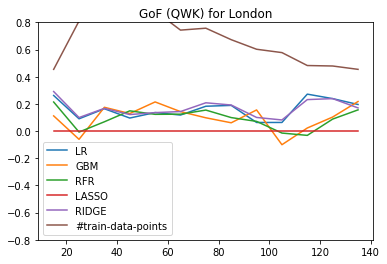

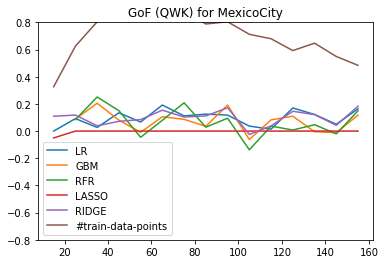

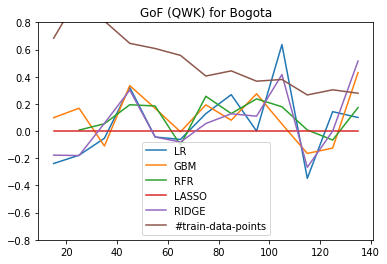

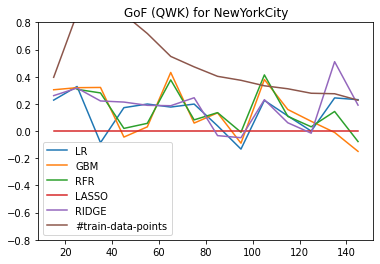

In [48]:
import matplotlib.pyplot as plt

for city in ["Singapore", "Mumbai", "Istanbul", "Capetown", "London", "MexicoCity", "Bogota", "NewYorkCity"]:
    lr = [] 
    gbm = [] 
    rfr = [] 
    lasso = [] 
    ridge = [] 
    x = [] 
    train_size = [] 
    for scale in range(15, 350, 10):
        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "linearregression")]
            lr.append(b["mu-scores-qwk"].to_numpy().flatten().tolist()[0])
        except:
            lr.append(float('nan'))

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "gradientboostingregressor")]
            gbm.append(b["mu-scores-qwk"].to_numpy().flatten().tolist()[0])
        except:
            gbm.append(float('nan'))        

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "randomforestregressor")]
            rfr.append(b["mu-scores-qwk"].to_numpy().flatten().tolist()[0])
        except:
            rfr.append(float('nan'))   

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "ridge")]
            ridge.append(b["mu-scores-qwk"].to_numpy().flatten().tolist()[0])
        except:
            ridge.append(float('nan'))  

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "lasso")]
            lasso.append(b["mu-scores-qwk"].to_numpy().flatten().tolist()[0])
        except:
            lasso.append(float('nan'))
        
        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "lasso")]
            train_size.append(b["trainSize"].to_numpy().flatten().tolist()[0])
        except:
            train_size.append(float('nan'))        

        x.append(scale)


    train_size = [k/max(train_size) for k in train_size] 
    plt.plot(x, lr, label = "LR")
    plt.plot(x, gbm, label = "GBM")
    plt.plot(x, rfr, label = "RFR")
    plt.plot(x, lasso, label = "LASSO")
    plt.plot(x, ridge, label = "RIDGE")
    plt.plot(x, train_size, "-",label = "#train-data-points")
    plt.legend()
    plt.ylim(-0.8,0.8)
    plt.title("GoF (QWK) for " + city)
    plt.show()
    

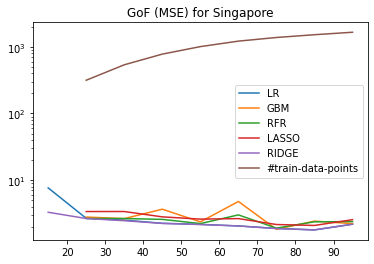

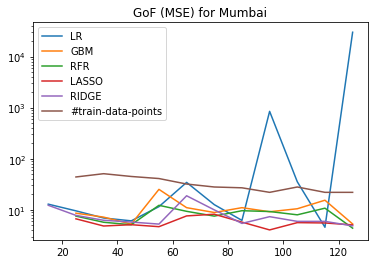

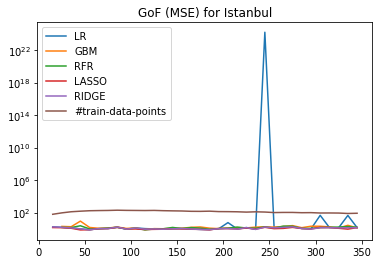

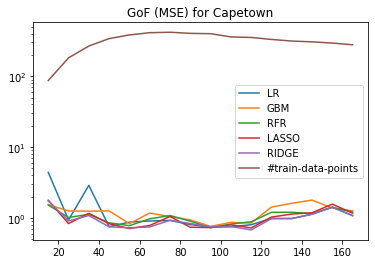

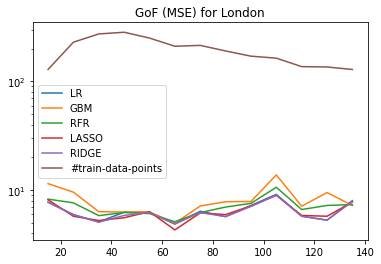

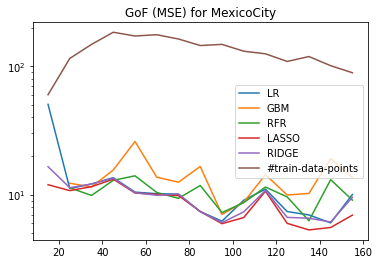

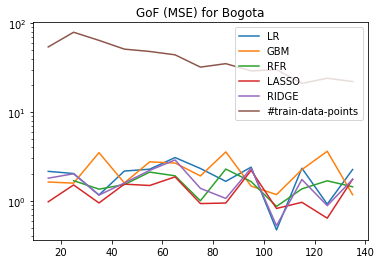

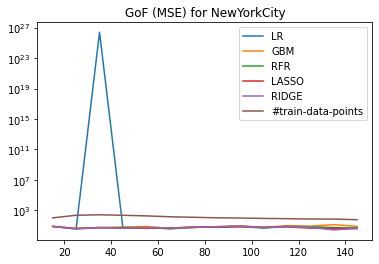

In [43]:
import matplotlib.pyplot as plt

for city in ["Singapore", "Mumbai", "Istanbul", "Capetown", "London", "MexicoCity", "Bogota", "NewYorkCity"]:
    lr = [] 
    gbm = [] 
    rfr = [] 
    lasso = [] 
    ridge = [] 
    x = [] 
    train_size = [] 
    for scale in range(15, 350, 10):
        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "linearregression")]
            lr.append(b["mu-scores-mse"].to_numpy().flatten().tolist()[0])
        except:
            lr.append(float('nan'))

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "gradientboostingregressor")]
            gbm.append(b["mu-scores-mse"].to_numpy().flatten().tolist()[0])
        except:
            gbm.append(float('nan'))        

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "randomforestregressor")]
            rfr.append(b["mu-scores-mse"].to_numpy().flatten().tolist()[0])
        except:
            rfr.append(float('nan'))   

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "ridge")]
            ridge.append(b["mu-scores-mse"].to_numpy().flatten().tolist()[0])
        except:
            ridge.append(float('nan'))  

        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "lasso")]
            lasso.append(b["mu-scores-mse"].to_numpy().flatten().tolist()[0])
        except:
            lasso.append(float('nan'))          
            
        try:
            b = df.loc[(df['city'] == city) & (df['seed'] == scale) & (df['model'] == "lasso")]
            train_size.append(b["trainSize"].to_numpy().flatten().tolist()[0])
        except:
            train_size.append(float('nan'))      
            
        x.append(scale)

    plt.plot(x, lr, label = "LR")
    plt.plot(x, gbm, label = "GBM")
    plt.plot(x, rfr, label = "RFR")
    plt.plot(x, lasso, label = "LASSO")
    plt.plot(x, ridge, label = "RIDGE")
    plt.plot(x, train_size, label = "#train-data-points")    
    plt.legend()
    plt.yscale("log")
#     plt.ylim(0, 20)
    plt.title("GoF (MSE) for " + city)
    plt.show()
    


In [39]:
b["trainSize"], scale

(Series([], Name: trainSize, dtype: float64), 15)